In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np

In [3]:
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier

# Decision Tree (DT) Implementation
This function is used to generate a decision tree and will return the accuracy of the test set when matched with the training set

In [12]:
def decisionTree(data, target_data, test=0.2, depth=None, random=0, criterion='gini', min_imp=0, max_leaf=None):
    decision_tree = tree.DecisionTreeClassifier(max_depth=depth, criterion='gini',random_state=0, min_impurity_decrease=min_imp,max_leaf_nodes=max_leaf)
    X_train, X_test, y_train, y_test = train_test_split(data, target_data , test_size=test)
    
    clf = decision_tree.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    return [accuracy_score(y_test, y_pred), accuracy_score(y_train, y_pred_train)]

# Random Forest (RF) Implementaion

In [123]:
def randomForest(data, target_data, random=None, maxF=None, n=100, min_split=2):
    X_train, X_test, y_train, y_test = train_test_split(data, target_data, test_size=0.2, random_state=random)
    classifier = RandomForestClassifier(n_estimators=n, random_state=random, max_features=maxF, min_samples_split=min_split) 

    clf = classifier.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    

    
    return  [accuracy_score(y_test, y_pred), accuracy_score(y_train, y_pred_train)]

# Neural Network (NN) Implementaion

In [58]:
def neuralNetwork(data, target_data,alpha=0.0001, learn_start=0.001, rate='constant', layer=(100,)):
    X_train, X_test, y_train, y_test = train_test_split(data, target_data, test_size=0.2)
    mlp = MLPClassifier(alpha=alpha, learning_rate_init=learn_start,learning_rate=rate, hidden_layer_sizes=layer)
    mlp.fit(X_train, y_train);
    y_pred= mlp.predict(X_test)
    y_pred_train = mlp.predict(X_train)
    
    return  [accuracy_score(y_test, y_pred), accuracy_score(y_train, y_pred_train)]

# First Data Set
Run this section when you want to have the data from the first data set

In [148]:
# open the data into 
file = open("data.txt")
data = np.loadtxt(file, delimiter =",")

target_data = data[:,-1]
data = data[:, :-1]

# Second Data Set
Run this section when you want to have the data from the second data set

In [136]:
# open the data into 
file = open("voice.txt")
file.readline()
data2 = np.loadtxt(file, delimiter =",")

target_data = data2[:,-1]
data = data2[:, :-1]

# DT: Exploring training size vs test size


[[63.  1.  1. ...  3.  0.  6.]
 [67.  1.  4. ...  2.  3.  3.]
 [67.  1.  4. ...  2.  2.  7.]
 ...
 [68.  1.  4. ...  2.  2.  7.]
 [57.  1.  4. ...  2.  1.  7.]
 [57.  0.  2. ...  2.  1.  3.]]


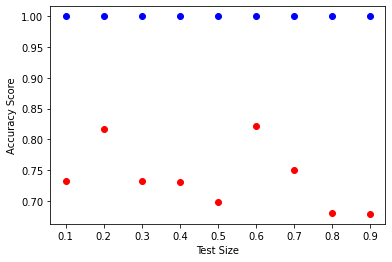

In [15]:
test_size_x = []
test_size_score = []
train_size_score = []
size = 1
print(data)
while(size < 10):
    test_size = size/10
    score = decisionTree(data, target_data, test=test_size)
    test_size_x.append(test_size)
    test_size_score.append(score[0])
    train_size_score.append(score[1])
    size += 1
plt.clf()
plt.plot(test_size_x, train_size_score, 'bo')
plt.plot(test_size_x, test_size_score, 'ro')
plt.ylabel('Accuracy Score')
plt.xlabel('Test Size')
plt.show()

# DT: Exploring max depth


[[63.  1.  1. ...  3.  0.  6.]
 [67.  1.  4. ...  2.  3.  3.]
 [67.  1.  4. ...  2.  2.  7.]
 ...
 [68.  1.  4. ...  2.  2.  7.]
 [57.  1.  4. ...  2.  1.  7.]
 [57.  0.  2. ...  2.  1.  3.]]


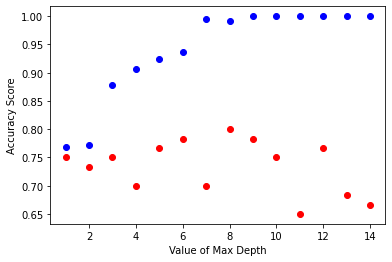

In [16]:
test_size_x = []
test_size_score = []
train_size_score = []
print(data)
for i in range(1, 15):
    score = decisionTree(data, target_data, depth=i)
    test_size_x.append(i)
    test_size_score.append(score[0])
    train_size_score.append(score[1])
plt.clf()
plt.plot(test_size_x, test_size_score, 'ro')
plt.plot(test_size_x, train_size_score, 'bo')
plt.ylabel('Accuracy Score')
plt.xlabel('Value of Max Depth')
plt.show()  

# DT: Exploring Random State


[[63.  1.  1. ...  3.  0.  6.]
 [67.  1.  4. ...  2.  3.  3.]
 [67.  1.  4. ...  2.  2.  7.]
 ...
 [68.  1.  4. ...  2.  2.  7.]
 [57.  1.  4. ...  2.  1.  7.]
 [57.  0.  2. ...  2.  1.  3.]]


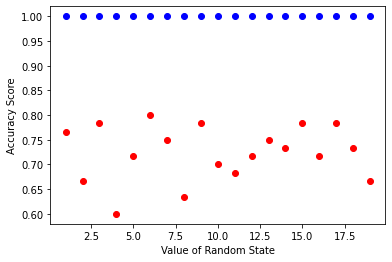

In [17]:
test_size_x = []
test_size_score = []
train_size_score = []
print(data)
for i in range(1, 20):
    score = decisionTree(data, target_data, random=i)
    test_size_x.append(i)
    test_size_score.append(score[0])
    train_size_score.append(score[1])
plt.plot(test_size_x, test_size_score, 'ro')
plt.plot(test_size_x, train_size_score, 'bo')
plt.ylabel('Accuracy Score')
plt.xlabel('Value of Random State')
plt.show()   

# DT: Gini Vs Entropy


[[63.  1.  1. ...  3.  0.  6.]
 [67.  1.  4. ...  2.  3.  3.]
 [67.  1.  4. ...  2.  2.  7.]
 ...
 [68.  1.  4. ...  2.  2.  7.]
 [57.  1.  4. ...  2.  1.  7.]
 [57.  0.  2. ...  2.  1.  3.]]


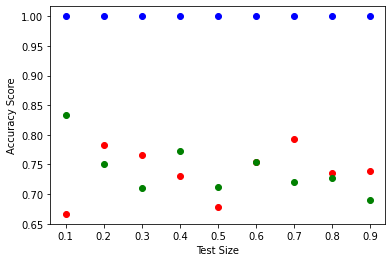

In [43]:
test_size_x = []
test_size_score = []
test_size_score2 = []
train_size_score = []
print(data)
size = 1

for i in range(1,10,1):
    size = i/10
    score = decisionTree(data, target_data, test=size)
    score2 = decisionTree(data, target_data,test=size, criterion='entropy')
    test_size_x.append(size)
    test_size_score2.append(score2[0])
    test_size_score.append(score[0])
    train_size_score.append(score[1])


plt.plot(test_size_x, test_size_score, 'ro')
plt.plot(test_size_x, test_size_score2, 'go')
plt.plot(test_size_x, train_size_score, 'bo')
plt.ylabel('Accuracy Score')
plt.xlabel('Test Size')
plt.show()

# DT: Exploring min_impurity_decrease

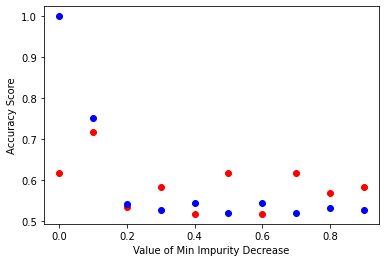

In [367]:
test_size_x = []
test_size_score = []
train_size_score = []
for i in range(0, 10):
    score = decisionTree(data, target_data, min_imp=(i/10))
    test_size_x.append(i/10)
    test_size_score.append(score[0])
    train_size_score.append(score[1])
plt.plot(test_size_x, test_size_score, 'ro')
plt.plot(test_size_x, train_size_score, 'bo')
plt.ylabel('Accuracy Score')
plt.xlabel('Value of Min Impurity Decrease')
plt.show()

# DT: Exploring Max Leaf Nodes

[[0.05978098 0.06424127 0.03202691 ... 0.0078125  0.         0.        ]
 [0.06600874 0.06731003 0.04022873 ... 0.0546875  0.046875   0.05263158]
 [0.0773155  0.08382942 0.03671846 ... 0.015625   0.0078125  0.04651163]
 ...
 [0.14205626 0.09579843 0.18373124 ... 2.9375     2.9296875  0.19475862]
 [0.14365874 0.09062826 0.18497617 ... 3.59375    3.5859375  0.31100218]
 [0.16550895 0.09288354 0.18304392 ... 0.5546875  0.546875   0.35      ]]


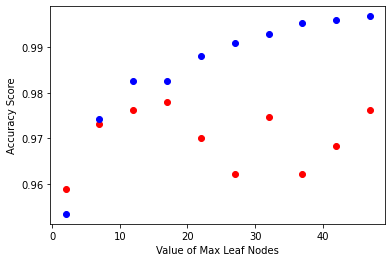

In [54]:
test_size_x = []
test_size_score = []
train_size_score = []
print(data)
for i in range(2, 50,5):
    score = decisionTree(data, target_data, max_leaf=i)
    test_size_x.append(i)
    test_size_score.append(score[0])
    train_size_score.append(score[1])
plt.plot(test_size_x, test_size_score, 'ro')
plt.plot(test_size_x, train_size_score, 'bo')
plt.ylabel('Accuracy Score')
plt.xlabel('Value of Max Leaf Nodes')
plt.show()

# RF: Exporing N Estimators

[[0.05978098 0.06424127 0.03202691 ... 0.0078125  0.         0.        ]
 [0.06600874 0.06731003 0.04022873 ... 0.0546875  0.046875   0.05263158]
 [0.0773155  0.08382942 0.03671846 ... 0.015625   0.0078125  0.04651163]
 ...
 [0.14205626 0.09579843 0.18373124 ... 2.9375     2.9296875  0.19475862]
 [0.14365874 0.09062826 0.18497617 ... 3.59375    3.5859375  0.31100218]
 [0.16550895 0.09288354 0.18304392 ... 0.5546875  0.546875   0.35      ]]


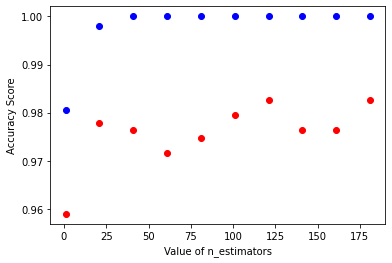

In [126]:
test_size_x = []
test_size_score = []
train_size_score = []
print(data)
for i in range(1,200, 20):
    score = randomForest(data, target_data,n=i)
    test_size_x.append(i)
    test_size_score.append(score[0])
    train_size_score.append(score[1])
    
    
plt.plot(test_size_x, test_size_score, 'ro')
plt.plot(test_size_x, train_size_score, 'bo')
plt.ylabel('Accuracy Score')
plt.xlabel('Value of n_estimators')
plt.show()  

# RF: Max Features


[[63.  1.  1. ...  3.  0.  6.]
 [67.  1.  4. ...  2.  3.  3.]
 [67.  1.  4. ...  2.  2.  7.]
 ...
 [68.  1.  4. ...  2.  2.  7.]
 [57.  1.  4. ...  2.  1.  7.]
 [57.  0.  2. ...  2.  1.  3.]]


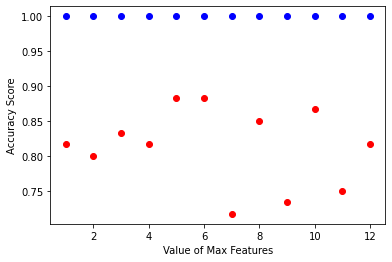

In [149]:
test_size_x = []
test_size_score = []
train_size_score = []
print(data)
for i in range(1,len(data[0])):
    score = randomForest(data, target_data,i)
    test_size_x.append(i)
    test_size_score.append(score[0])
    train_size_score.append(score[1])
    

plt.plot(test_size_x, test_size_score, 'ro')
plt.plot(test_size_x, train_size_score, 'bo')
plt.ylabel('Accuracy Score')
plt.xlabel('Value of Max Features')
plt.show()  

# RF: Minimun Samples Split

[[63.  1.  1. ...  3.  0.  6.]
 [67.  1.  4. ...  2.  3.  3.]
 [67.  1.  4. ...  2.  2.  7.]
 ...
 [68.  1.  4. ...  2.  2.  7.]
 [57.  1.  4. ...  2.  1.  7.]
 [57.  0.  2. ...  2.  1.  3.]]


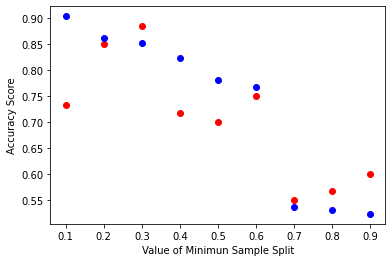

In [132]:
test_size_x = []
test_size_score = []
train_size_score = []
print(data)
for i in range(1, 10):
    score = randomForest(data, target_data, min_split=i/10)
    test_size_x.append(i/10)
    test_size_score.append(score[0])
    train_size_score.append(score[1])
plt.plot(test_size_x, test_size_score, 'ro')
plt.plot(test_size_x, train_size_score, 'bo')
plt.ylabel('Accuracy Score')
plt.xlabel('Value of Minimun Sample Split')
plt.show()  

# NN: Exploring alpha

[[63.  1.  1. ...  3.  0.  6.]
 [67.  1.  4. ...  2.  3.  3.]
 [67.  1.  4. ...  2.  2.  7.]
 ...
 [68.  1.  4. ...  2.  2.  7.]
 [57.  1.  4. ...  2.  1.  7.]
 [57.  0.  2. ...  2.  1.  3.]]


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


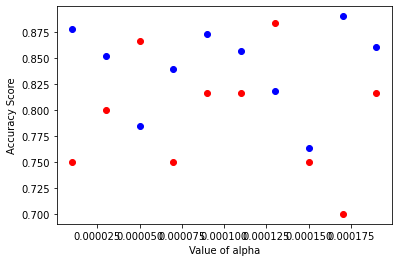

In [122]:
test_size_x = []
test_size_score = []
train_size_score = []
print(data)
for i in range(1,20, 2):
    x = i *(10**-5)
    score = neuralNetwork(data, target_data,alpha=x)
    test_size_x.append(x)
    test_size_score.append(score[0])
    train_size_score.append(score[1])
plt.plot(test_size_x, test_size_score, 'ro')
plt.plot(test_size_x, train_size_score, 'bo')
plt.ylabel('Accuracy Score')
plt.xlabel('Value of alpha')
plt.show()  

# NN: Exploring the initial learning rate with Constant Learning

[[63.  1.  1. ...  3.  0.  6.]
 [67.  1.  4. ...  2.  3.  3.]
 [67.  1.  4. ...  2.  2.  7.]
 ...
 [68.  1.  4. ...  2.  2.  7.]
 [57.  1.  4. ...  2.  1.  7.]
 [57.  0.  2. ...  2.  1.  3.]]


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


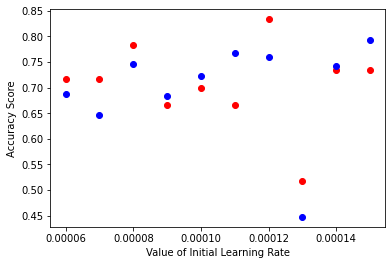

In [75]:
test_size_x = []
test_size_score = []
train_size_score = []
print(data)
for i in range(15,5,-1):
    score = neuralNetwork(data, target_data,learn_start=(i/10000))
    test_size_x.append(i/10000)
    test_size_score.append(score[0])
    train_size_score.append(score[1])
plt.plot(test_size_x, test_size_score, 'ro')
plt.plot(test_size_x, train_size_score, 'bo')
plt.ylabel('Accuracy Score')
plt.xlabel('Value of Initial Learning Rate')
plt.show()  

# NN: Exploring the initial learning rate with Adaptive Learning

[[0.05978098 0.06424127 0.03202691 ... 0.0078125  0.         0.        ]
 [0.06600874 0.06731003 0.04022873 ... 0.0546875  0.046875   0.05263158]
 [0.0773155  0.08382942 0.03671846 ... 0.015625   0.0078125  0.04651163]
 ...
 [0.14205626 0.09579843 0.18373124 ... 2.9375     2.9296875  0.19475862]
 [0.14365874 0.09062826 0.18497617 ... 3.59375    3.5859375  0.31100218]
 [0.16550895 0.09288354 0.18304392 ... 0.5546875  0.546875   0.35      ]]


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


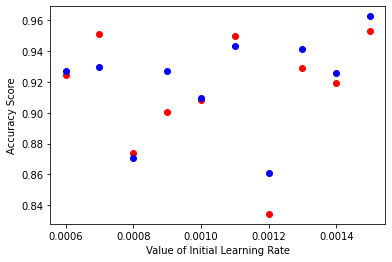

In [137]:
test_size_x = []
test_size_score = []
train_size_score = []
print(data)
for i in range(15,5,-1):
    score = neuralNetwork(data, target_data,learn_start=(i/10000), rate='adaptive')
    test_size_x.append(i/10000)
    test_size_score.append(score[0])
    train_size_score.append(score[1])
plt.plot(test_size_x, test_size_score, 'ro')
plt.plot(test_size_x, train_size_score, 'bo')
plt.ylabel('Accuracy Score')
plt.xlabel('Value of Initial Learning Rate')
plt.show()  

# NN: Exploring the initial learning rate with Invscaling

[[0.05978098 0.06424127 0.03202691 ... 0.0078125  0.         0.        ]
 [0.06600874 0.06731003 0.04022873 ... 0.0546875  0.046875   0.05263158]
 [0.0773155  0.08382942 0.03671846 ... 0.015625   0.0078125  0.04651163]
 ...
 [0.14205626 0.09579843 0.18373124 ... 2.9375     2.9296875  0.19475862]
 [0.14365874 0.09062826 0.18497617 ... 3.59375    3.5859375  0.31100218]
 [0.16550895 0.09288354 0.18304392 ... 0.5546875  0.546875   0.35      ]]


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


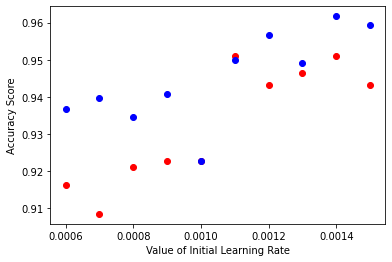

In [82]:
test_size_x = []
test_size_score = []
train_size_score = []
print(data)
for i in range(15,5,-1):
    score = neuralNetwork(data, target_data,learn_start=(i/10000), rate='invscaling')
    test_size_x.append(i/10000)
    test_size_score.append(score[0])
    train_size_score.append(score[1])
plt.plot(test_size_x, test_size_score, 'ro')
plt.plot(test_size_x, train_size_score, 'bo')
plt.ylabel('Accuracy Score')
plt.xlabel('Value of Initial Learning Rate')
plt.show()  

# NN: Exploring Hiden Layer Size

[[0.05978098 0.06424127 0.03202691 ... 0.0078125  0.         0.        ]
 [0.06600874 0.06731003 0.04022873 ... 0.0546875  0.046875   0.05263158]
 [0.0773155  0.08382942 0.03671846 ... 0.015625   0.0078125  0.04651163]
 ...
 [0.14205626 0.09579843 0.18373124 ... 2.9375     2.9296875  0.19475862]
 [0.14365874 0.09062826 0.18497617 ... 3.59375    3.5859375  0.31100218]
 [0.16550895 0.09288354 0.18304392 ... 0.5546875  0.546875   0.35      ]]


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


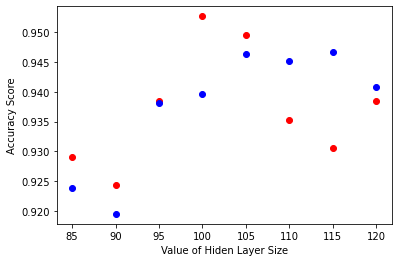

In [138]:
test_size_x = []
test_size_score = []
train_size_score = []
print(data)
for i in range(120, 80,-5):
    value = (i,)
    score = neuralNetwork(data, target_data)
    test_size_x.append(i)
    test_size_score.append(score[0])
    train_size_score.append(score[1])
plt.plot(test_size_x, test_size_score, 'ro')
plt.plot(test_size_x, train_size_score, 'bo')
plt.ylabel('Accuracy Score')
plt.xlabel('Value of Hiden Layer Size')
plt.show() 